<a href="https://colab.research.google.com/github/JayR3d/Text-Analytics-/blob/main/Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the needed libraries

In [ ]:
! pip install requests
! pip install beautifulsoup4
! pip install pikepdf
! pip install PyPDF2

In [ ]:
import nltk
from nltk import TreebankWordTokenizer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import urllib
import pikepdf
import PyPDF2
from bs4 import BeautifulSoup
import requests
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
nltk.download('stopwords')


Unlocking the pdf file

In [4]:
with pikepdf.open('deloitte-uk-disruption-in-the-automotive-industry.pdf') as pdf_1:
  pdf_1.save('output.pdf')


Opening the unlocked pdf file

In [9]:
pdfFileObject = open('output.pdf', 'rb')
pdfReader = PyPDF2.PdfReader(pdfFileObject)
count = len(pdfReader.pages)
text_file = ''
for i in range(count):
    page = pdfReader.pages[i]
    text_file += page.extract_text()


Removing punctuation

In [11]:
def remove_punctuation(words):
    words = words.lower()
    return ''.join([x for x in words if x not in string.punctuation])

This function takes in a list of words and returns a dictionary
        with each word as a key, and the value represents the number of times the word repeats
        

In [12]:
# bag of words
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary
        with each word as a key, and the value represents the number of
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict


In [13]:
def most_common_words(bag):
    switch = [(value, key) for key, value in bag.items()]
    switch = sorted(switch, reverse=True)
    return switch[1:11]

#Deloitte-uk-disruption-in-the-automotive-industry.pdf

Word frequency

In [14]:
data = remove_punctuation(text_file)
# tokenise data

tokeniser = TreebankWordTokenizer()
tokens = tokeniser.tokenize(data)

# remove stopwords
tokens_less_stopwords = [word for word in tokens if word not in stopwords.words('english')]

# create bag of words
bag_of_words = bag_of_words_count(tokens_less_stopwords)

most_common_words(bag_of_words)

[(52, 'connected'),
 (48, 'oems'),
 (44, 'use'),
 (42, 'customer'),
 (42, 'automotive'),
 (41, 'industry'),
 (35, 'connectivity'),
 (33, 'experience'),
 (31, '–'),
 (31, 'vehicle')]

WordCloud

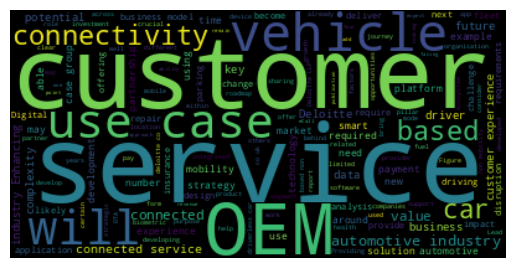

In [15]:
# Start with one review:
text = text_file

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#The pwc.com Article (industrial-manufacturing-automotive)

In [16]:
# Step 1: Sending a HTTP request to a URL
url = 'https://www.pwc.com/gx/en/services/deals/trends/industrial-manufacturing-automotive.html?j=227720&sfmc_sub=8467&l=16_HTML&u=4087690&mid=510000034&jb=1'

# Make a GET request to fetch the raw HTML content
response = requests.get(url)

# From the response, we need the text
page = response.text

# Step 2: Parse the html content
# Parse the html content
soup = BeautifulSoup(page, "html.parser")
text_file_2 = soup.prettify() # print the parsed data of html

In [17]:
# Remove tags
result_without_tags = [item.text for item in soup.find_all('p')]

Word frequency

In [ ]:
data_2 = remove_punctuation(str(result_without_tags))
# tokenise data

tokeniser = TreebankWordTokenizer()
tokens_2 = tokeniser.tokenize(data_2)

# remove stopwords
tokens_less_stopwords_2 = [word for word in tokens_2 if word not in stopwords.words('english')]

# create bag of words
bag_of_words_2 = bag_of_words_count(tokens_less_stopwords)

most_common_words(bag_of_words_2)

[(60, 'services'),
 (58, 'industry'),
 (42, 'connected'),
 (38, 'use'),
 (36, 'connectivity'),
 (26, 'value'),
 (26, 'case'),
 (18, 'œ'),
 (18, 'future'),
 (18, 'disruption')]

WordCloud

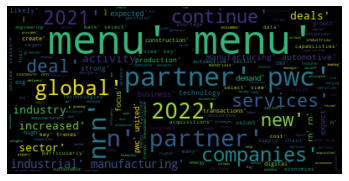

In [ ]:
# Start with one review:
text = str(tokens_less_stopwords_2)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#US-2022-global-automotive-consumer-study-global-focus-emea

In [ ]:
# read in the data
with pikepdf.open('us-2022-global-automotive-consumer-study-global-focus-emea.pdf') as pdf_3:
  pdf_3.save('output_3.pdf')

In [ ]:
pdfFileObject = open('output_3.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObject)
count = pdfReader.numPages
text_file_3 = ''
for i in range(count):
    page = pdfReader.getPage(i)
    text_file_3 += page.extractText()


Word frequency



In [ ]:
data_3 = remove_punctuation(text_file_3)
# tokenise data

tokeniser = TreebankWordTokenizer()
tokens_3 = tokeniser.tokenize(data_3)

# remove stopwords
tokens_less_stopwords_3 = [word for word in tokens_3 if word not in stopwords.words('english')]

# create bag of words
bag_of_words_3 = bag_of_words_count(tokens_less_stopwords_3)

most_common_words(bag_of_words_3)

[(60, 'services'),
 (58, 'industry'),
 (43, 'connected'),
 (39, 'use'),
 (36, 'connectivity'),
 (26, 'value'),
 (26, 'case'),
 (25, 'ł'),
 (21, 'south'),
 (21, 'romania')]

WordCloud

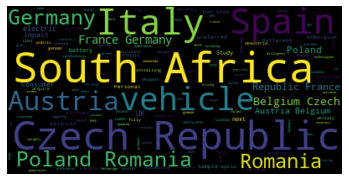

In [ ]:
# Start with one review:
text = text_file_3

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Gartner top-five-automotive-technology-trends

In [ ]:
# Step 1: Sending a HTTP request to a URL
url_2= 'https://www.gartner.com/en/newsroom/press-releases/2022-02-17-gartner-identifies-top-five-automotive-technology-trends-for-2022'

# Make a GET request to fetch the raw HTML content
response_2 = requests.get(url_2)

# From the response, we need the text
page_2 = response.text

# Step 2: Parse the html content
# Parse the html content
soup_2 = BeautifulSoup(page_2, "html.parser")
print(soup.prettify()) # print the parsed data of html

In [ ]:
# Remove tags
result_without_tags_2 = [item.text for item in soup_2.find_all('p')]

Word frequency

In [ ]:
data_4 = remove_punctuation(str(result_without_tags_2))
# tokenise data

tokeniser = TreebankWordTokenizer()
tokens_4 = tokeniser.tokenize(data_4)

# remove stopwords
tokens_less_stopwords_4 = [word for word in tokens_4 if word not in stopwords.words('english')]

# create bag of words
bag_of_words_4 = bag_of_words_count(tokens_less_stopwords_4)

most_common_words(bag_of_words_4)

[(71, 'services'),
 (70, 'menu'),
 (67, 'industry'),
 (43, 'connected'),
 (41, 'use'),
 (37, 'connectivity'),
 (31, 'value'),
 (30, 'pwc'),
 (26, 'case'),
 (25, 'ł')]

WordCloud

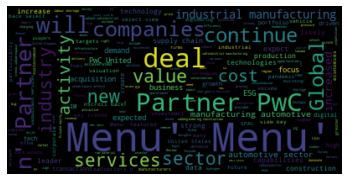

In [ ]:
# Start with one review:
text = str(result_without_tags_2)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()